Model 1: Beyerton-Holt grozth, fractional parasitism

Original Model:
$$\\ h_{t+1} = [\frac{R_{0}h_{t}}{1+(R_{0}-1)h_{t}}](\frac{1}{1+p_{t}})$$
$$\\ p_{t+1} = b[\frac{R_{0}h_{t}}{1+(R_{0}-1)h_{t}}](\frac{p_{t}}{1+p_{t}})$$

Lagged (3D) Model:
$$\\ x_{t+1} = y_{t}$$
$$\\ y_{t+1} = R_{0}y_{t}[\frac{1}{1+(R_{0}-1)x_{t}}](\frac{1}{1+z_{t}})$$
$$\\ z_{t+1} = bR_{0}y_{t}[\frac{1}{1+(R_{0}-1)x_{t}}](\frac{z_{t}}{1+z_{t}})$$


In [1]:
from sympy import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
init_printing(wrap_line=False)


x, y, z = symbols('x y z')
R0, b = var('R0, b')
f1 = y
f2 = R0*y*(1/(1+(R0-1)*x))*(1/(1+z))
f3 = b*R0*y*(1/(1+(R0-1)*x))*(z/(1+z))
fixed_points = solve([f1-x, f2-y, f3-z],[x,y,z])

map = Matrix([f1,f2,f3])
jac = map.jacobian([x,y,z])
comm_fp = fixed_points[2]
comm_mat = jac.subs([(x,comm_fp[0]),(y,comm_fp[1]), (z,comm_fp[2])])


def sim_mat(M):
    new_mat = zeros(3,3)
    NI, NJ = M.shape
    for i in range(NI):
        for j in range(NJ):
            new_mat[i,j] = simplify(M[i,j])
    return new_mat

comm_simple = sim_mat(comm_mat)

chareq = comm_simple.charpoly()
a0, a1, a2, a3 = chareq.coeffs()
lam = symbols('lambda')
soln = solve(chareq,[lam])

# Jury Conditions
jury1 = simplify(1 + a1 + a2 + a3)
jury2 = simplify(1 - a1 + a2 - a3)
jury3 = simplify(3 + a1 - a2 -3*a3)
jury4 = simplify(1 + a1*a3 -a2 - a3**2)

###some solutions of the jury conditions
j1solR = solve([jury1], [R0])
j1solb = solve([jury1], [b])

j2solR = solve([jury2], [R0])
j2solb = solve([jury2], [b])

j3solR = solve([jury3], [R0])
j3solb = solve([jury3], [b])

j4solR = solve([jury4], [R0])
j4solb = solve([jury4], [b])

print("Map")
pprint(map, use_unicode=False)
print("****************\n")

print("fixed points")
pprint(fixed_points, use_unicode=False)
print("****************\n")

print("jacobian matrix")
pprint(jac, use_unicode=False)
print("****************\n")

print("communal fixed point")
pprint(comm_fp, use_unicode=False)
print("*****************\n")

print("community matrix")
pprint(comm_mat, use_unicode=False)
print("*****************\n")

print("community matrix simplified")
pprint(comm_simple, use_unicode=False)
print("*****************\n")

print("***characteristic equation of community matrix")
pprint(chareq, use_unicode=False)
print("*****************\n")

print("***coefficients of characteristic equation")
pprint([a0, a1, a2, a3], use_unicode=False)
print("*****************\n")

print("jury condition 1")
pprint(jury1, use_unicode=False)
print("*****************\n")

print("jury condition 2")
pprint(jury2, use_unicode=False)
print("*****************\n")

print("jury condition 3")
pprint(jury3, use_unicode=False)
print("*****************\n")

print("jury condition 4")
pprint(jury4, use_unicode=False)
print("*****************\n")

print("solution implied by jury1 for R0")
pprint(j1solR, use_unicode=False)
print("*****************\n")

print("solution implied by jury1 for b")
pprint(j1solb, use_unicode=False)
print("*****************\n")

print("solution implied by jury2 for R0")
pprint(j2solR, use_unicode=False)
print("*****************\n")

print("solution implied by jury2 for b")
pprint(j2solb, use_unicode=False)
print("*****************\n")

print("solution implied by jury3 for R0")
pprint(j3solR, use_unicode=False)
print("*****************\n")

print("solution implied by jury3 for b")
pprint(j3solb, use_unicode=False)
print("*****************\n")

print("solution implied by jury4 for R0")
pprint(j4solR, use_unicode=False)
print("*****************\n")

print("solution implied by jury4 for b")
pprint(j4solb, use_unicode=False)
print("*****************\n")


Map
[           y            ]
[                        ]
[          R0*y          ]
[------------------------]
[(z + 1)*(x*(R0 - 1) + 1)]
[                        ]
[        R0*b*y*z        ]
[------------------------]
[(z + 1)*(x*(R0 - 1) + 1)]
****************

fixed points
                        1  1  R0*b - R0 - b + 1  
[(0, 0, 0), (1, 1, 0), (-, -, -----------------)]
                        b  b      R0 + b - 1     
****************

jacobian matrix
[            0                         1                                        0                           ]
[                                                                                                           ]
[      R0*y*(1 - R0)                   R0                                     -R0*y                         ]
[-------------------------  ------------------------                -------------------------               ]
[                        2  (z + 1)*(x*(R0 - 1) + 1)                       2                      

some plots in parameter space

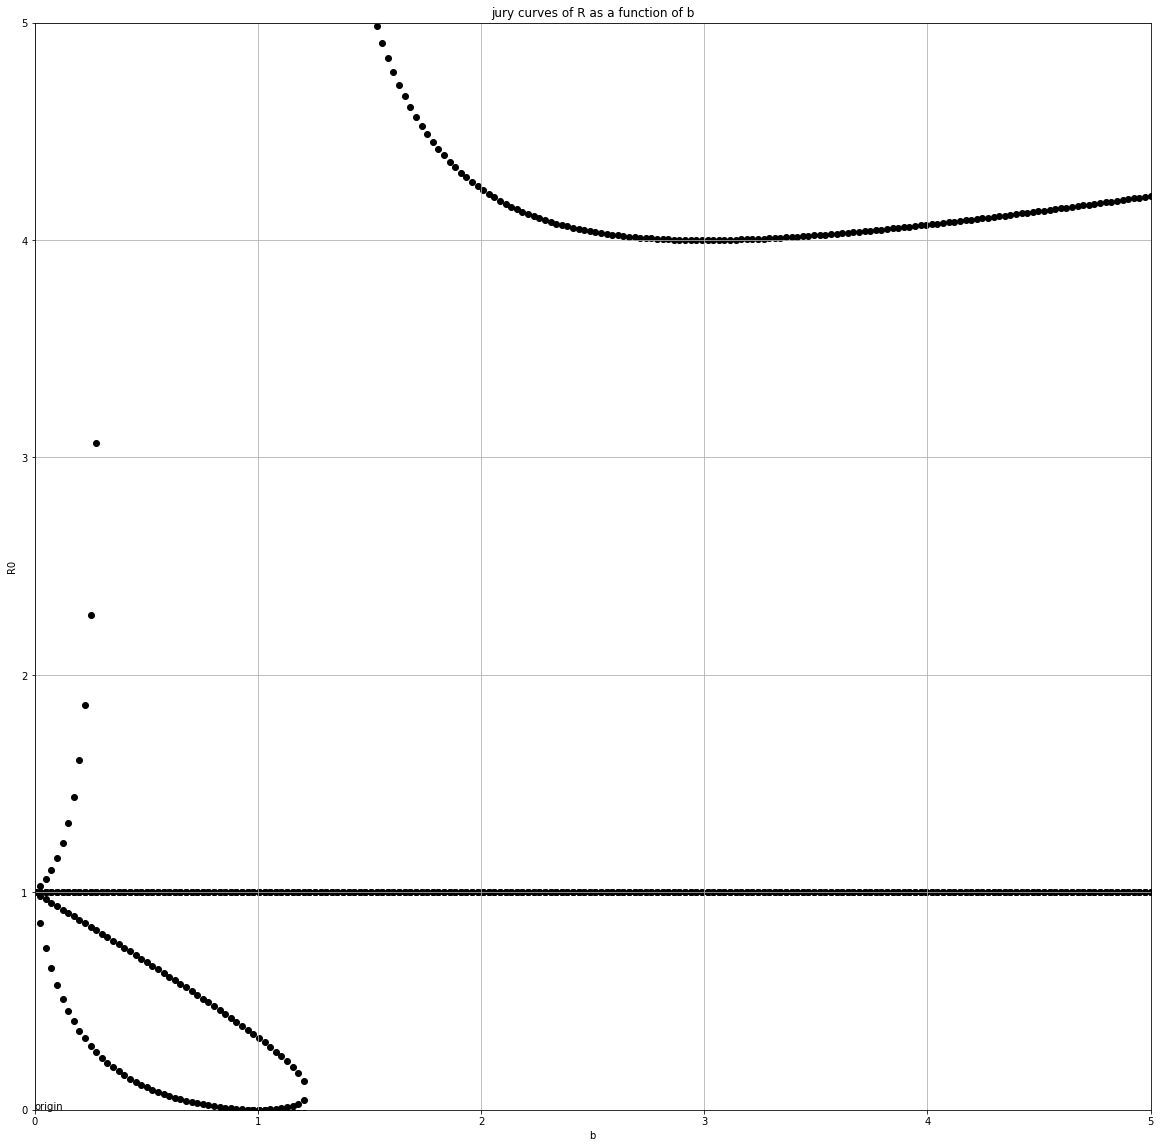

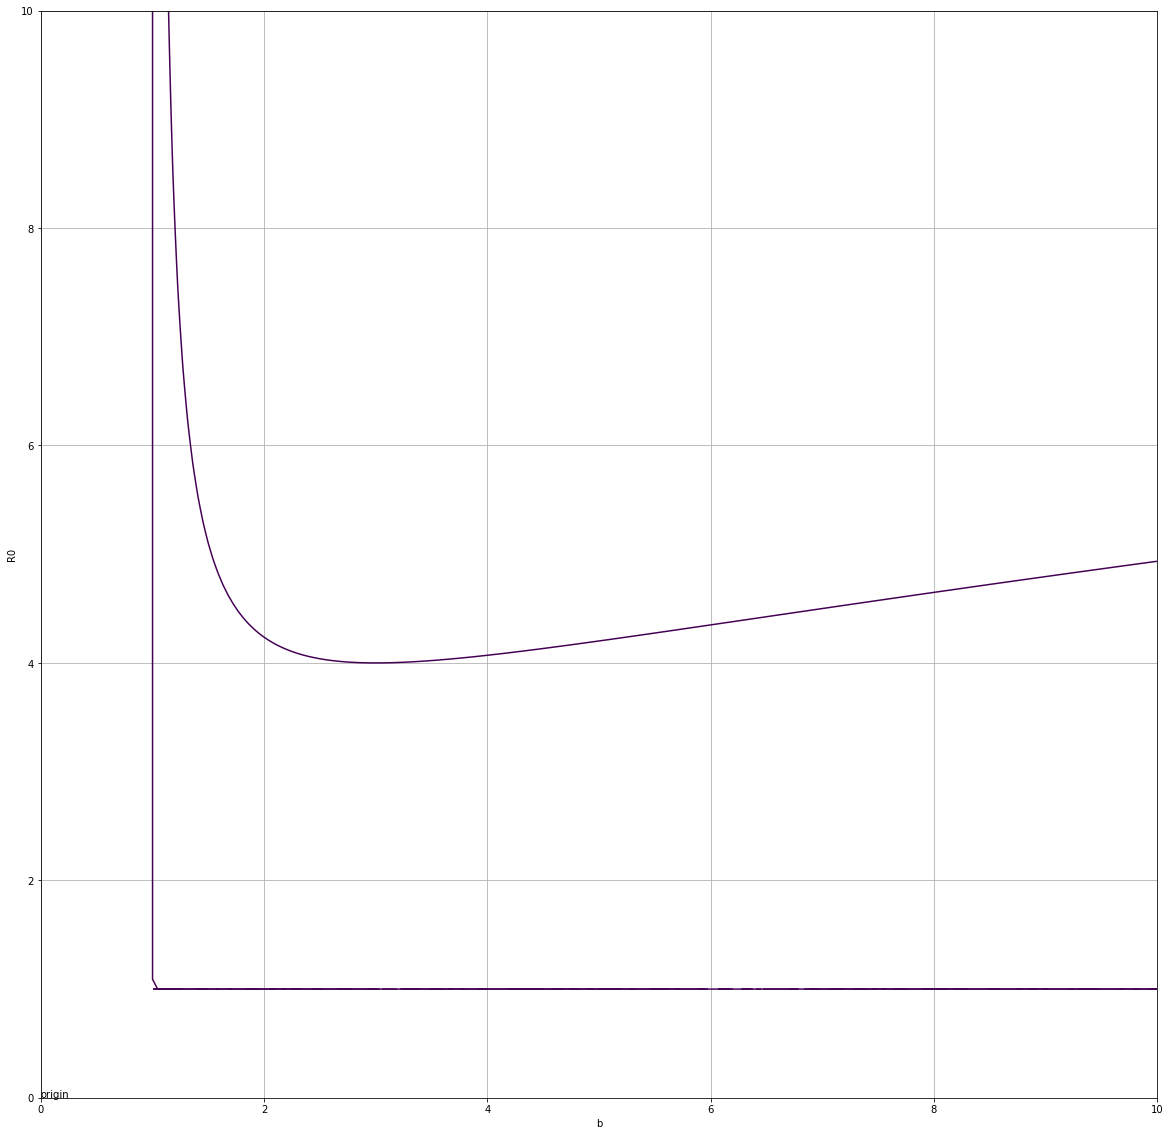

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
warnings.filterwarnings('ignore')


def lamplot(pts, f, sym, ax):
    for pt in pts:
        num = lambdify(sym,f[sym],"numpy")
        val = num(pt)
        ax.scatter(pt,val,color='k')

#plot the jury curves implied by jcs with R0=g(b)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1)
bees = np.linspace(0,5,200)
lamplot(bees,j1solR,R0,ax)

for bee in bees:
    Rnum1 = lambdify(b,j2solR[0],"numpy")
    Rval1 = Rnum1(bee)
    ax.scatter(bee,Rval1,color='k')
    Rnum2 = lambdify(b,j2solR[1],"numpy")
    Rval2 = Rnum2(bee)
    ax.scatter(bee,Rval2,color='k')

for bee in bees:
    Rnum13 = lambdify(b,j3solR[0],"numpy")
    Rval13 = Rnum13(bee)
    ax.scatter(bee,Rval13,color='k')
    Rnum23 = lambdify(b,j3solR[1],"numpy")
    Rval23 = Rnum23(bee)
    ax.scatter(bee,Rval23,color='k')

for bee in bees:
    Rnum14 = lambdify(b,j4solR[0],"numpy")
    Rval14 = Rnum14(bee)
    ax.scatter(bee,Rval14,color='k')
    Rnum24 = lambdify(b,j4solR[1],"numpy")
    Rval24 = Rnum24(bee)
    ax.scatter(bee,Rval24,color='k')
    Rnum34 = lambdify(b,j4solR[2],"numpy")
    Rval34 = Rnum34(bee)
    ax.scatter(bee,Rval34,color='k')

ax.text(0,0,'origin')
ax.set_xlabel('b')
ax.set_ylabel('R0')
ax.set_xlim(0,5)
ax.set_ylim(0,5)
ax.grid()
ax.set_title('jury curves of R as a function of b')

#plot contours implied by the jury conditions
Bsp, Rsp = np.meshgrid(np.linspace(1,10,200), np.linspace(1,10,100))
fig3 = plt.figure(figsize=(20,20))
ax3 = fig3.add_subplot(1,1,1)
jury1num = lambdify([R0,b],jury1,"numpy")
jury2num = lambdify([R0,b],jury2,"numpy")
jury3num = lambdify([R0,b],jury3,"numpy")
jury4num = lambdify([R0,b],jury4,"numpy")
ax3.contour(Bsp,Rsp,jury1num(Rsp,Bsp),[0],color='k')
ax3.contour(Bsp,Rsp,jury2num(Rsp,Bsp),[0],color='r')
ax3.contour(Bsp,Rsp,jury3num(Rsp,Bsp),[0],color='g')
ax3.contour(Bsp,Rsp,jury4num(Rsp,Bsp),[0],color='c')
ax3.text(0,0,'origin')
ax3.set_xlabel('b')
ax3.set_ylabel('R0')
ax3.set_xlim(0,10)
ax3.set_ylim(0,10)
ax3.grid()



scatter plot of fps

Text(0.6666666662669252, 0.6666666661743917, '(0.667, 0.667, 0.059)')

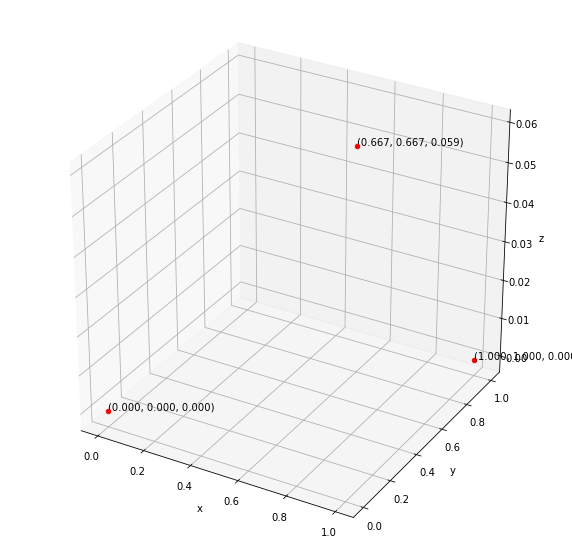

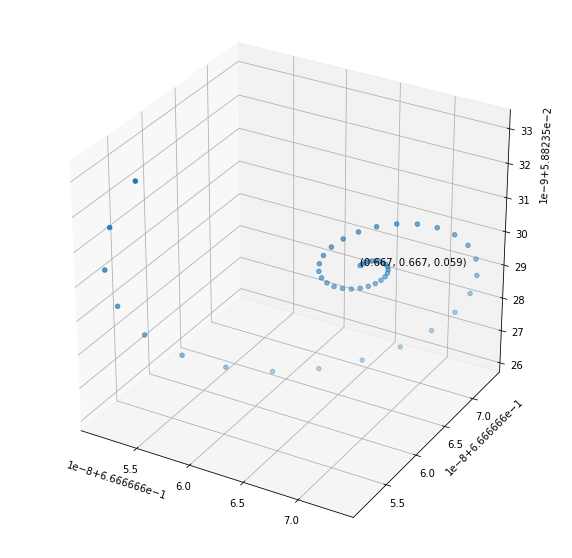

In [3]:
rval = 1.2
bval = 1.5
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1,projection='3d')
for fp in fixed_points:
    nums = lambdify((R0,b),fp,"numpy")
    xpt, ypt, zpt = nums(rval,bval)
    label = '(%.3f, %.3f, %.3f)' % (xpt, ypt, zpt)
    ax.scatter(xpt,ypt,zpt,color='red')
    ax.text(xpt,ypt,zpt,label)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

def clutch(b):
    return b

def bh_growth(R,x):
    return R*(1/(1+(R-1)*x))

def frac_decay(z):
    return 1/(1+z)


def orbit(x0, y0, z0, R, b, its, k):
    x = [x0]
    y = [y0]
    z = [z0]
    i = 1
    while i <= its:
        next_x = y[i-1]
        next_y = y[i-1]*bh_growth(R,x[i-1])*frac_decay(z[i-1])
        next_z = y[i-1]*clutch(b)*bh_growth(R,x[i-1])*(1-frac_decay(z[i-1]))
        x.append(next_x)
        y.append(next_y)
        z.append(next_z)
        i += 1
    return x[-k:], y[-k:], z[-k:]

x0 = .51
y0 = .5
z0 = .2
Rv = 1.2
bv = 1.5
its = 300
k = 50
X, Y, Z = orbit(x0,y0,z0,Rv,bv,its,k)
fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(X,Y,Z)
xpt = X[-1:][0]
ypt = Y[-1:][0]
zpt = Z[-1:][0]
label = '(%.3f, %.3f, %.3f)' % (xpt, ypt, zpt)
ax2.text(xpt,ypt,zpt,label)

Nullclines

Text(0.5, 0, 'Z')

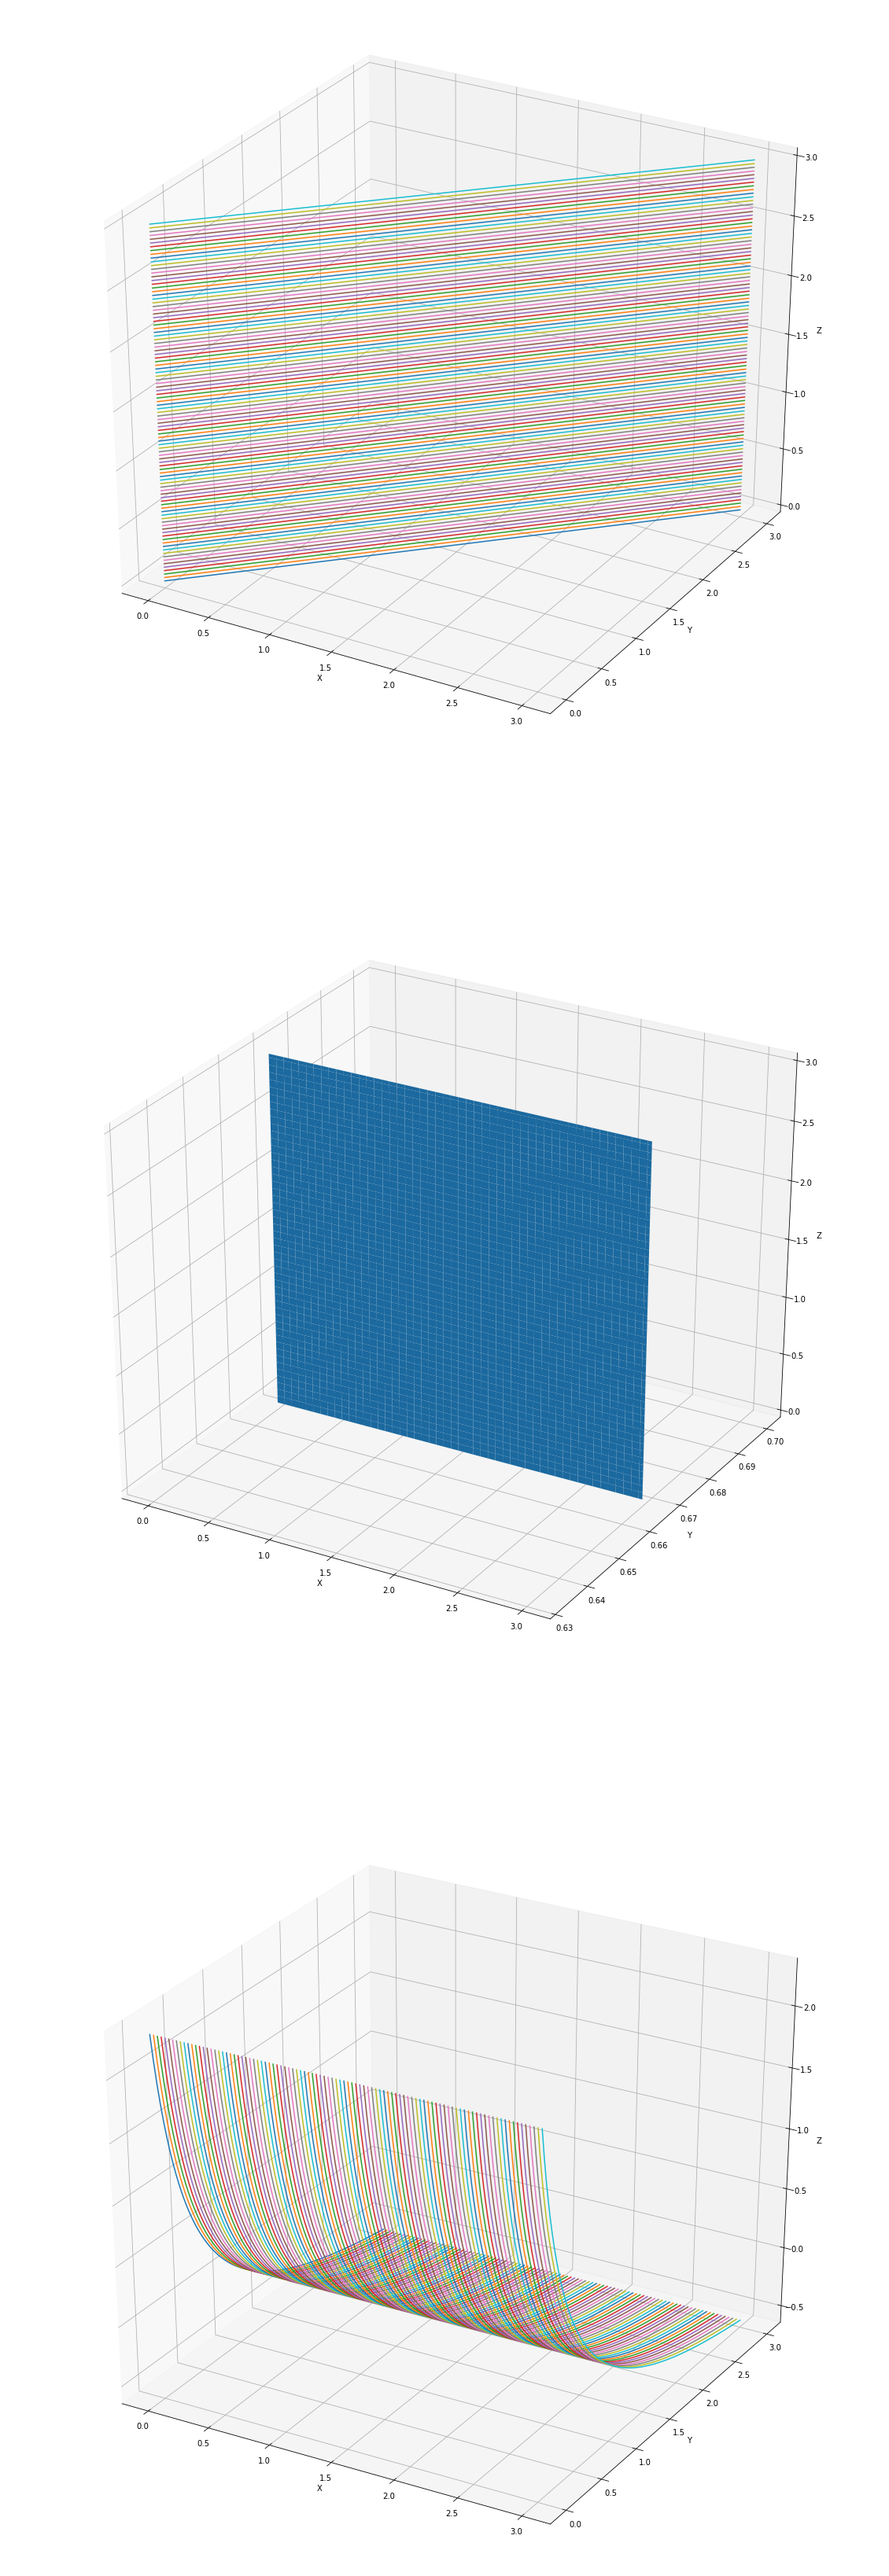

In [4]:
def lagged_host_nc(ypt):
    return ypt

def host_nc(bpt):
    return 1/bpt

def parasite_nc(ypt,rpt):
    R0pt = np.exp(rpt)
    return R0pt/(1 + (R0pt-1)*ypt)-1

rpt = 1.2
bpt = 1.5

fig = plt.figure(figsize=(20,60))
ax1 = fig.add_subplot(3,1,1,projection='3d')
ypt = np.linspace(0,3,100)
xpt = lagged_host_nc(ypt)
for zpt in np.linspace(0,3,100):
    ax1.plot(xpt,ypt,zpt,zdir='z')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax2 = fig.add_subplot(3,1,2,projection='3d')
y2 = host_nc(bpt)
x2, z2 = np.meshgrid(np.linspace(0,3,100), np.linspace(0,3,100))
ax2.plot_surface(x2,y2,z2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

ax3 = fig.add_subplot(3,1,3,projection='3d')
y3 = np.linspace(0,3,100)
z3 = parasite_nc(y3,rpt)
for x3 in np.linspace(0,3,100):
    ax3.plot(y3,z3,x3,zdir='x')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

Now trying some built in inequality plotters

R₀⋅b - R₀ - b + 1    
───────────────── > 0
       R₀⋅b          
R₀⋅b⋅(R₀ + b - 1) + R₀⋅b⋅(3⋅R₀ + b - 3) + (R₀ + b - 1)⋅(R₀⋅b + R₀ + b - 1)    
────────────────────────────────────────────────────────────────────────── > 0
                            R₀⋅b⋅(R₀ + b - 1)                                 
R₀⋅b⋅(R₀ - b - 1) + 3⋅R₀⋅b⋅(R₀ + b - 1) + (R₀ + b - 1)⋅(-R₀⋅b - R₀ - b + 1)    
─────────────────────────────────────────────────────────────────────────── > 0
                             R₀⋅b⋅(R₀ + b - 1)                                 
               2                                                        2                                                
- R₀⋅b⋅(R₀ - 1)  + R₀⋅b⋅(-2⋅R₀ - b + 2)⋅(R₀ + b - 1) + R₀⋅b⋅(R₀ + b - 1)  + (R₀ - 1)⋅(R₀ + b - 1)⋅(R₀⋅b + R₀ + b - 1)    
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────── > 0
                                                                   2                       

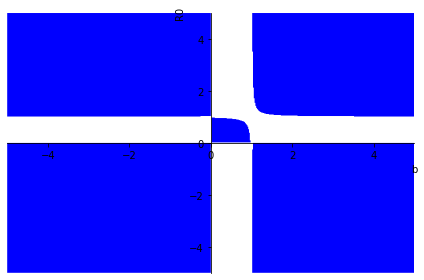

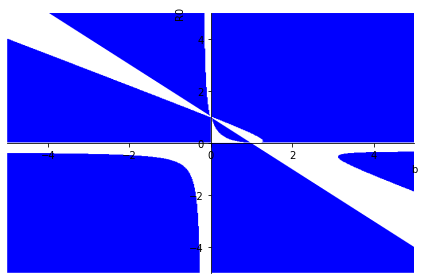

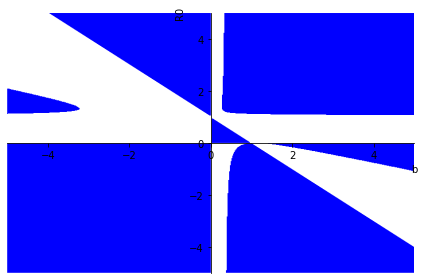

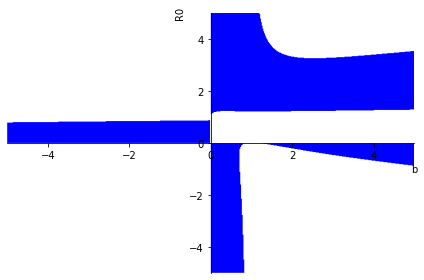

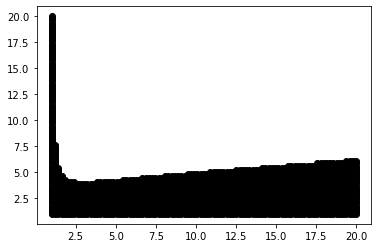

In [5]:
# %load_ext sympy.interactive.ipythonprinting
warnings.filterwarnings('ignore')

ineq1 = jury1>0
ineq2 = jury2>0
ineq3 = jury3>0
ineq4 = jury4>0
pprint(ineq1)
pprint(ineq2)
pprint(ineq3)
pprint(ineq4)
plot_implicit(ineq1)
plot_implicit(ineq2)
plot_implicit(ineq3)
plot_implicit(ineq4)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
Bsp, Rsp = np.meshgrid(np.linspace(0,20,100),np.linspace(0,20,100))
NI, NJ = Bsp.shape
for i in range(NI):
    for j in range(NJ):
        bv = Bsp[i,j]
        Rv = Rsp[i,j]
        if jury1num(Rv,bv)>0 and jury2num(Rv,bv)>0 and jury3num(Rv,bv)>0 and jury4num(Rv,bv)>0:
            ax.scatter(bv,Rv,color='k')
            
print("fixed points")
pprint(fixed_points, use_unicode=False)
print("****************\n")            

by inspection of the plots and the solutions to the jury conditions
we can express the stability region as

$$\\ R0 > 1 $$
$$\\ b > 1 $$
$$\\ R0 < \frac{b\sqrt{4b-3}+3b-2}{2(b-1)} $$

fixed points
                        1  1  R0*b - R0 - b + 1  
[(0, 0, 0), (1, 1, 0), (-, -, -----------------)]
                        b  b      R0 + b - 1     
****************



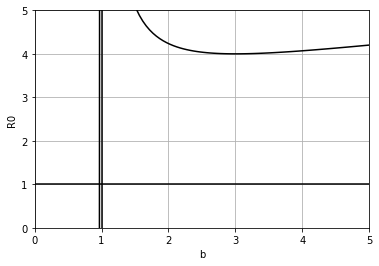

In [7]:
def curve_bound(bgrd):
    rnums = lambdify(b,j4solR[2][0],"numpy")
    return rnums(bgrd)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
bgrd = np.linspace(0,5,100)
rgrd = np.linspace(0,5,100)
ax.plot(bgrd,np.full(bgrd.shape,1),'k')
ax.plot(np.full(rgrd.shape,1),rgrd,'k')
ax.plot(bgrd,curve_bound(bgrd),'k')
ax.set_xlabel('b')
ax.set_ylabel('R0')
ax.set_xlim(0,5)
ax.set_ylim(0,5)
ax.grid()
print("fixed points")
pprint(fixed_points, use_unicode=False)
print("****************\n")

some analysis of the eigenvalues near the stable region
lets look at the eigen values of the community matrix
for various points in the positive b,r plane
5 regions implied by plot, plus 3 curves to be on
8 total points
1) (.5,.5)
2) (.5, 2)
3) (2, .5)
4) (2, 2)
5) (3, 5)
6) (1, 2) (on vertical line)
7) (2, 1) (on horizontal line)
8) (3, f(3)) (on the curve)
9) (bonus) eigenvalues at the intersection of r=1, b=1

In [8]:
warnings.filterwarnings('ignore')

rbpts = [(.7,.7), (.5, 2), (2, .5), (2,2),
         (3,5), (1,2), (2,1), (3,curve_bound(3)), (1,1)]

for pt in rbpts:
    mat = np.array(comm_simple.subs([(b,pt[0]),(R0,pt[1])])).astype(np.float64)
    ptstr = "("+str(pt[0])+","+str(pt[1])+")"
    eigs = np.linalg.eigvals(mat)
    print(ptstr)
    print(eigs)
    print("*******\n")

(0.7,0.7)
[-0.51600139+0.j          1.16616396+0.30585302j  1.16616396-0.30585302j]
*******

(0.5,2)
[1.77165929+0.j         0.36417036+0.49363451j 0.36417036-0.49363451j]
*******

(2,0.5)
[ 2.10893886 -0.24751522  0.63857637]
*******

(2,2)
[0.44075618+0.j         0.65462191+0.57249121j 0.65462191-0.57249121j]
*******

(3,5)
[0.46735562+0.92508517j 0.46735562-0.92508517j 0.53195543+0.j        ]
*******

(1,2)
[0.5+0.5j 0.5-0.5j 1. +0.j ]
*******

(2,1)
[0. 1. 1.]
*******

(3,4.0)
[0.5+0.8660254j 0.5-0.8660254j 0.5+0.j       ]
*******

(1,1)
[0. 1. 1.]
*******



bifurcations
we want to see how orbits change over key transition states
1) R=2, .7<b<1.3 (cross the vertical line)
2) b=2, .7<R<1.3 (cross the horizontal line)
3) b=3, 3<R<5 (cross the curve vertically)
4) R=4.5, 1.3<b<2
we will consider both Y and Z (host, parasite)

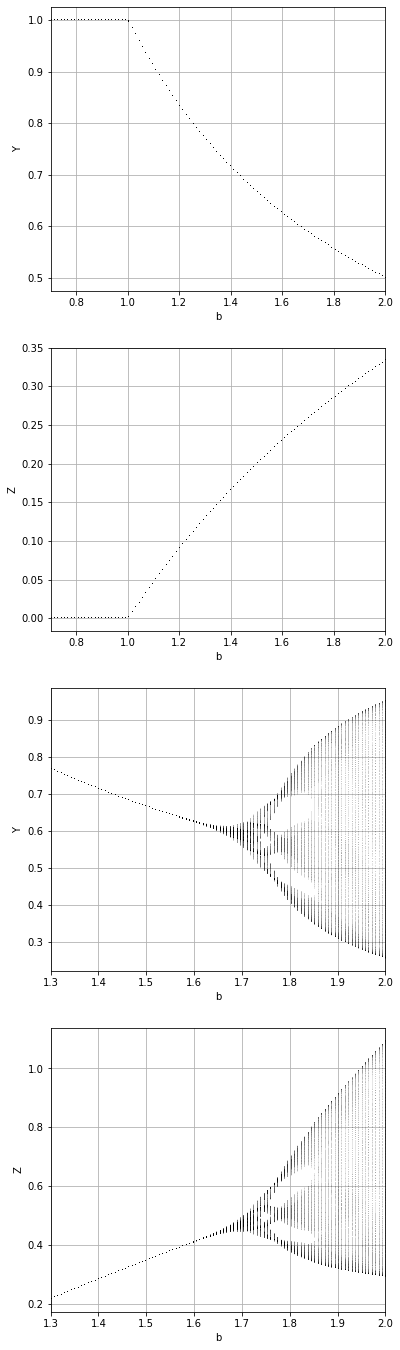

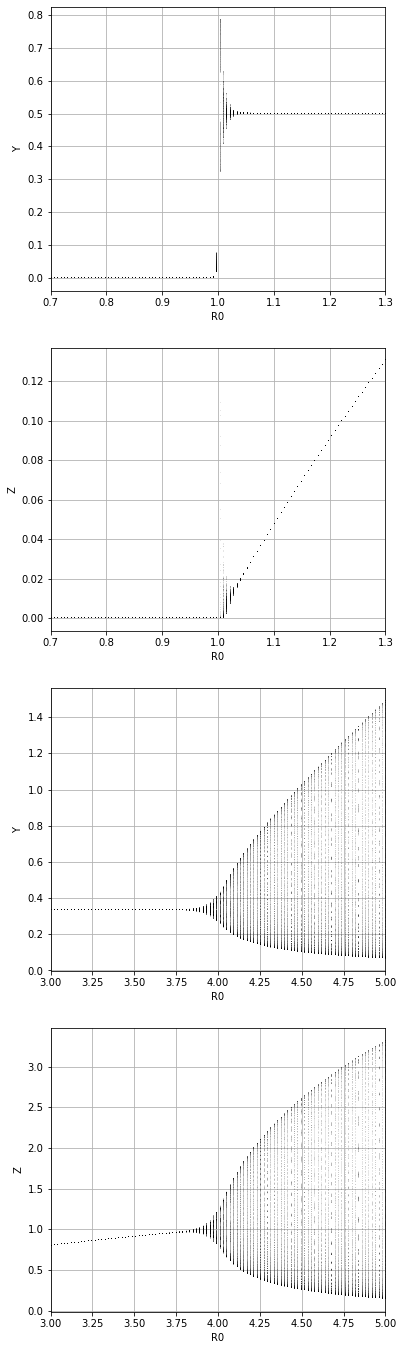

In [12]:
def bf_plotby(R,bmin, bmax, n, x0, y0, z0,its,k,ax):
    b_range = np.linspace(bmin, bmax, n)
    for bpt in b_range:
        y_data = np.asarray(orbit(x0,y0,z0,R,bpt,its,k)[1])
        bvec = np.full(k,bpt)
        ax.plot(bvec, y_data,',k', alpha=.10)


def bf_plotbz(R,bmin, bmax, n, x0, y0, z0,its,k,ax):
    b_range = np.linspace(bmin, bmax, n)
    for bpt in b_range:
        z_data = np.asarray(orbit(x0,y0,z0,R,bpt,its,k)[2])
        bvec = np.full(k,bpt)
        ax.plot(bvec, z_data,',k', alpha=.10)

def bf_plotRy(bpt,Rmin, Rmax, n, x0, y0, z0,its,k,ax):
    R_range = np.linspace(Rmin, Rmax, n)
    for Rpt in R_range:
        y_data = np.asarray(orbit(x0,y0,z0,Rpt,bpt,its,k)[1])
        Rvec = np.full(k,Rpt)
        ax.plot(Rvec, y_data,',k', alpha=.10)


def bf_plotRz(bpt,Rmin, Rmax, n, x0, y0, z0,its,k,ax):
    R_range = np.linspace(Rmin, Rmax, n)
    for Rpt in R_range:
        z_data = np.asarray(orbit(x0,y0,z0,Rpt,bpt,its,k)[2])
        Rvec = np.full(k,Rpt)
        ax.plot(Rvec, z_data,',k', alpha=.10)

n = 100
x0 = .51
y0 = .5
z0 = .2
its = 1000
k= 500

###bifurcations for fixed R, varying b
fig1 = plt.figure(figsize=(6,24))
#R=2, .7<b<1.3
R = 2
bmin = .7
bmax = 2
ax1 = fig1.add_subplot(4,1,1)
ax2 = fig1.add_subplot(4,1,2)
bf_plotby(R,bmin,bmax,n,x0,y0,z0,its,k,ax1)
ax1.set_xlim(bmin,bmax)
ax1.set_xlabel('b')
ax1.set_ylabel('Y')
ax1.grid()
bf_plotbz(R,bmin,bmax,n,x0,y0,z0,its,k,ax2)
ax2.set_xlim(bmin,bmax)
ax2.set_xlabel('b')
ax2.set_ylabel('Z')
ax2.grid()


###
#R=4.5, 1.3<b<2
R= 4.5
bmin = 1.3
bmax = 2.0
ax3 = fig1.add_subplot(4,1,3)
ax4 = fig1.add_subplot(4,1,4)
bf_plotby(R,bmin,bmax,n,x0,y0,z0,its,k,ax3)
ax3.set_xlim(bmin,bmax)
ax3.set_xlabel('b')
ax3.set_ylabel('Y')
ax3.grid()
bf_plotbz(R,bmin,bmax,n,x0,y0,z0,its,k,ax4)
ax4.set_xlim(bmin,bmax)
ax4.set_xlabel('b')
ax4.set_ylabel('Z')
ax4.grid()

############
############

###bifurcations for fixed b, varying R
fig2 = plt.figure(figsize=(6,24))
#b=2, .7<R<1.3
bpt = 2
Rmin = .7
Rmax = 1.3
ax5 = fig2.add_subplot(4,1,1)
ax6 = fig2.add_subplot(4,1,2)
bf_plotRy(bpt,Rmin,Rmax,n,x0,y0,z0,its,k,ax5)
ax5.set_xlim(Rmin,Rmax)
ax5.set_xlabel('R0')
ax5.set_ylabel('Y')
ax5.grid()
bf_plotRz(bpt,Rmin,Rmax,n,x0,y0,z0,its,k,ax6)
ax6.set_xlim(Rmin,Rmax)
ax6.set_xlabel('R0')
ax6.set_ylabel('Z')
ax6.grid()


###
#b=2, .7<R<1.3
bpt = 3
Rmin = 3
Rmax = 5
ax7 = fig2.add_subplot(4,1,3)
ax8 = fig2.add_subplot(4,1,4)
bf_plotRy(bpt,Rmin,Rmax,n,x0,y0,z0,its,k,ax7)
ax7.set_xlim(Rmin,Rmax)
ax7.set_xlabel('R0')
ax7.set_ylabel('Y')
ax7.grid()
bf_plotRz(bpt,Rmin,Rmax,n,x0,y0,z0,its,k,ax8)
ax8.set_xlim(Rmin,Rmax)
ax8.set_xlabel('R0')
ax8.set_ylabel('Z')
ax8.grid()



Now, lets look at how the orbits change as we vary r,b

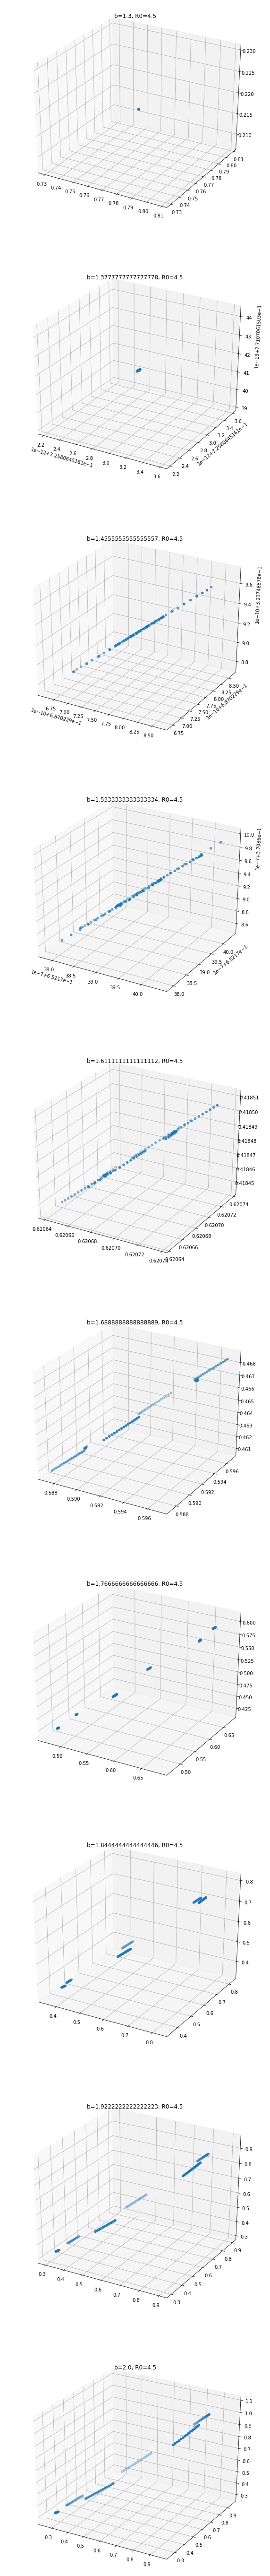

In [10]:
bpts = np.linspace(1.3,2,10)
R = np.full(bpts.shape[0],4.5)
fig1 = plt.figure(figsize=(10,100))
x0 = .51
y0 = .7
z0 = .5
its = 1000
k= 100
for i in range(bpts.shape[0]):
    ax = fig1.add_subplot(bpts.shape[0],1,i+1,projection='3d')
    X, Y, Z = orbit(x0,y0,z0,R[i],bpts[i],its,k)
    ax.scatter(X,Y,Z)
    label = "b="+str(bpts[i])+", "+"R0="+str(R[i])
    ax.set_title(label)
